<a href="https://colab.research.google.com/github/YASHSHARMA704/Vehicle-Routing-Using-Genetic-Algorithm/blob/main/Vehicle_Routing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [36]:
# Task 1 - Define the number of locations and vehicles
num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

In [4]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.


In [5]:
# Task 2 - Finish setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals


In [6]:
# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

In [7]:
toolbox.register("evaluate", evalVRP)  # Register the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function "mate" that uses "partially matched crossover technique" suitable for permutation-based representation -> uses to inherited one segment from one parent and remaining from another in order to maintain uniqueness.
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [40]:
def plot_routes(individual, title="Optimal Route"):
    plt.figure(figsize=(10, 8))
    # Colors and markers for different vehicles
    colors = plt.cm.viridis(np.linspace(0, 1, num_vehicles))
    markers = ['o', 's', '^', 'D', 'v', '*']

    # Plot routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        x_coords, y_coords = zip(*vehicle_route)
        plt.plot(x_coords, y_coords, '-', color=colors[i], marker=markers[i % len(markers)],
                 label=f'Vehicle {i+1}', markersize=10, linewidth=2)

    # Plot locations
    for (x, y) in locations:
        plt.plot(x, y, 'bo', markersize=8, zorder=1)  # Blue dots for locations

    # Plot the depot last so it is not overlapped
    plt.plot(depot[0], depot[1], 'rs', markersize=12, label='Depot', zorder=2)  # Red square for depot

    plt.title(title, fontsize=16)
    plt.xlabel('X Coordinate', fontsize=14)
    plt.ylabel('Y Coordinate', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()



gen	nevals	avg    	min     
0  	500   	620.358	0.502058
1  	366   	600.088	2.21488 
2  	379   	589.971	2.82711 
3  	372   	581.51 	4.94919 
4  	402   	579.689	4.43731 
5  	383   	571.997	1.09529 
6  	372   	571.224	2.38835 
7  	373   	566.407	2.53897 
8  	363   	558.974	2.88752 
9  	381   	559.58 	1.65928 
10 	391   	565.438	3.79962 
11 	395   	560.052	3.28099 
12 	402   	561.478	0.529197
13 	398   	555.391	0.529197
14 	375   	545.422	1.41678 
15 	395   	542.072	1.41678 
16 	396   	534.092	4.49983 
17 	377   	524.637	1.83242 
18 	373   	509.375	3.48703 
19 	373   	501.342	2.98146 
20 	392   	498.275	1.5936  
21 	378   	490.429	3.73733 
22 	368   	477.375	1.64773 
23 	374   	477.663	1.25517 
24 	391   	465.572	1.5417  
25 	392   	460.742	1.5417  
26 	382   	447.904	3.47056 
27 	384   	435.08 	3.73142 
28 	398   	418.066	1.96239 
29 	378   	399.632	1.96239 
30 	382   	388.123	1.39267 
31 	365   	379.262	1.39267 
32 	370   	371.803	1.39267 
33 	377   	365.9  	2.33782 
34 	390   	358.904	4

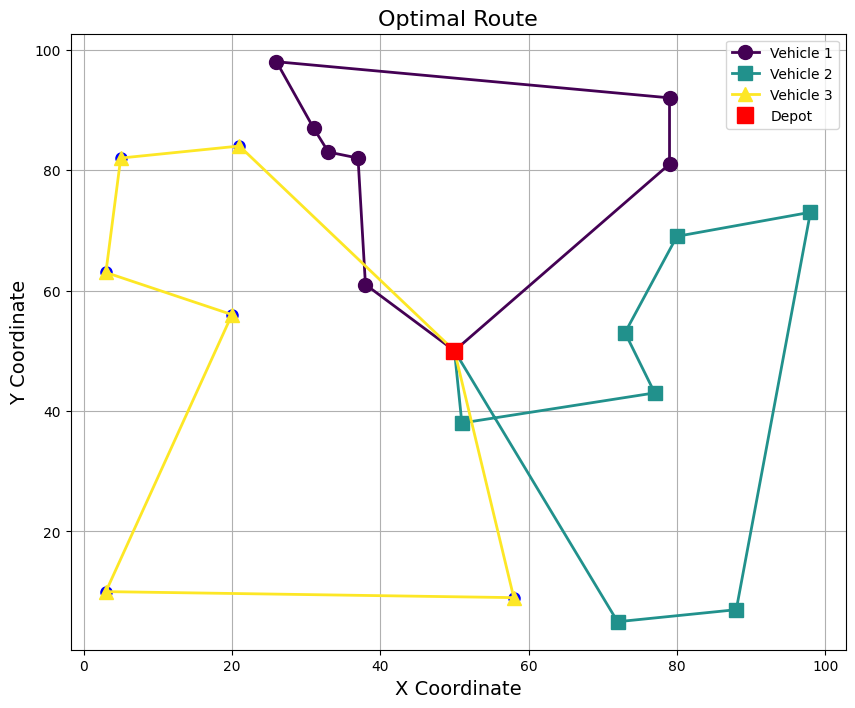

In [50]:
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=500)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 500, stats=stats, halloffame=hof)

    best_individual = hof[0]
    print("Best Individual:", best_individual)
    print("Best Fitness:", best_individual.fitness.values[0])

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()